In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import metrics



In [ ]:
data = pd.read_csv('/content/clean_quarterly_df_human.csv').dropna()
data.time=pd.to_datetime(data.time,dayfirst=True)

In [ ]:
data.columns

Index(['time', 'MIN_TEMPERATURE_C', 'max_clients_quarter',
       'total_Holiday_Food_Related', 'total_consommation',
       'pdl_max_total_daily_load', 'pdl_max_daily_load'],
      dtype='object')

In [ ]:
df_input=data[['MIN_TEMPERATURE_C', 'max_clients_quarter',
       'total_Holiday_Food_Related', 'total_consommation',
       'pdl_max_total_daily_load', 'pdl_max_daily_load']]

train,test=df_input[:-2],df_input[-2:]
X_train,y_train=np.array(train.drop(['pdl_max_daily_load'],axis=1)),np.array(train.pdl_max_daily_load)
X_test,y_test=np.array(test.drop(['pdl_max_daily_load'],axis=1)),np.array(test.pdl_max_daily_load)


In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima

stepwise_model = auto_arima(y=y_train,X=X_train,start_p=1, start_q=1,max_p=7, max_q=7,
                            max_P=7, max_Q=7,max_order=None,m=4,stepwise=True,
                            seasonal=True,stationary=True,suppress_warnings=True,
                            trace=True,)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[4] intercept   : AIC=255.774, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=247.390, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=249.474, Time=0.18 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=249.979, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=286.345, Time=0.13 sec
 ARIMA(0,0,0)(1,0,0)[4] intercept   : AIC=247.431, Time=0.13 sec
 ARIMA(0,0,0)(0,0,1)[4] intercept   : AIC=248.722, Time=0.16 sec
 ARIMA(0,0,0)(1,0,1)[4] intercept   : AIC=251.390, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=249.967, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[4] intercept   : AIC=249.632, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[4] intercept   : AIC=251.774, Time=0.27 sec

Best model:  ARIMA(0,0,0)(0,0,0)[4] intercept
Total fit time: 2.118 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                        SARIMAX   Log Likelihood                -116.695
Date:                Fri, 27 Aug 2021   AIC                            247.390
Time:                        00:28:33   BIC                            254.360
Sample:                             0   HQIC                           248.750
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.6027    220.351      0.016      0.987    -428.277     435.482
x1            -1.6022     23.056     -0.069      0.945     -46.791      43.586
x2             0.0768      0.144      0.532      0.595      -0.206       0.360
x3             7.9383      3.370      2.356      0.018       1.334      14.543
x4             0.0004      0.000      0.963      0.336      -0.000       0.001
x5             0.0344      0.023      1.522      0.128      -0.010       0.079
sigma2      6848.0898     19.932    343.573      0.000    6809.024    6887.156
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 5.38
Prob(Q):                              0.87   Prob(JB):                         0.07
Heteroskedasticity (H):               1.49   Skew:                            -0.83
Prob(H) (two-sided):                  0.61   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.19e+17. Standard errors may be unstable.
"""

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  def smape(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 2/y_true.shape[0]*np.sum(np.abs(y_true-y_pred))/np.sum((np.abs(y_true)+np.abs(y_pred)))*100
  def mase(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    naive_pred=y_true[1:]
    return 1/y_true.shape[0]*np.sum(np.abs(y_true-y_pred))/np.sum(np.abs(y_true[:len(y_true)-1]-naive_pred))*(y_true.shape[0]-1)
  #def owe(y_true,y_pred):
   # return (mase(y_true,y_pred)+smape(y_true,y_pred))/2

  print('Evaluation metric results:-')
  print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
  print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
  print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
  print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)} %')
  #mape.append(mean_absolute_percentage_error(y_true, y_pred))
  #rmse.append(np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
  print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
  print('SMAPE is : '+str(smape(y_true,y_pred))+'\n')
  print('MASE is : '+str(mase(y_true,y_pred)))
  return

In [ ]:
y_test=pd.DataFrame(data=y_test,index=np.arange(20,22),columns=['actual'])

In [ ]:
forecast,conf_int = stepwise_model.predict(n_periods=2, X=X_test, return_conf_int=True)
#alpha=confidence_interval=0.05 (previous method)
forecast = pd.DataFrame(forecast,columns=['PDL_pred'])
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(20, 22)
df_conf = df_conf.set_index("new_index")
timeseries_evaluation_metrics_func(y_test.actual, forecast.PDL_pred)

Evaluation metric results:-
MSE is : 2580.842075967353
MAE is : 42.12872835443818
RMSE is : 50.80198889775235
MAPE is : 2.645432020437749 %
R2 is : -5.787224394391461

SMAPE is : 1.345703653517067

MASE is : 1.0802238039599534


In [ ]:
forecast["new_index"] = range(20, 22)
forecast = forecast.set_index("new_index")

In [ ]:
forecast

,PDL_pred
new_index,
20,1573.738372
21,1528.480915


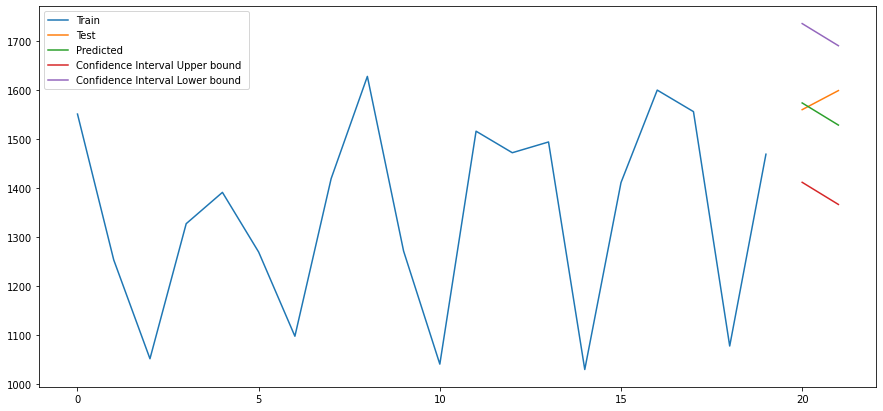

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [15,7]
plt.plot(y_train, label='Train ')
plt.plot(y_test.actual, label='Test ')
plt.plot(forecast['PDL_pred'], label='Predicted ')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

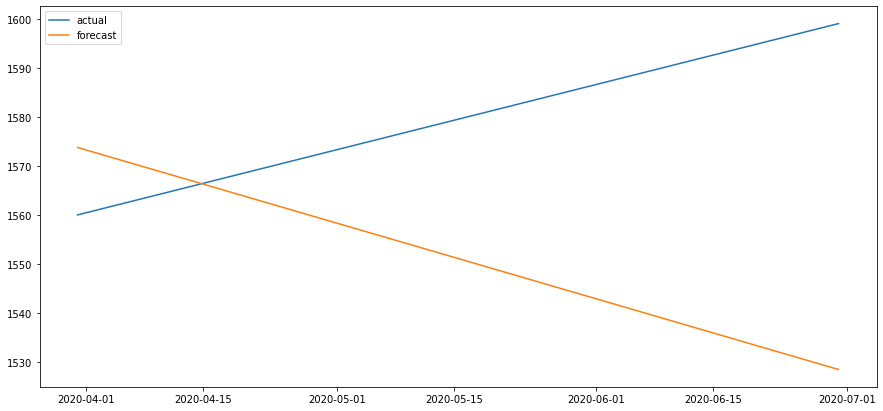

In [ ]:
# plot baseline and predictions
time=data.time[-2:]

plt.plot(time,y_test.actual,label='actual')
plt.plot(time,forecast['PDL_pred'],label='forecast')
plt.legend()
plt.show()

# peak period

In [ ]:
timeseries_evaluation_metrics_func(y_test.actual[:1], forecast.PDL_pred[:1])

Evaluation metric results:-
MSE is : 188.74287040112915
MAE is : 13.738372188914127
RMSE is : 13.738372188914127
MAPE is : 0.8806648839047517 %
R2 is : nan

SMAPE is : 0.8768040313025802

MASE is : nan


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
